<a href="https://colab.research.google.com/github/tigerrex9/Senior-Project/blob/main/mnist_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint, TensorBoard
from datetime import datetime

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           xlabel='Predicted label',
           ylabel='True label',
           title='Confusion matrix')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2. else "black")
    fig.tight_layout()
    plt.show()

def plot_graphs(history, best):
  
  plt.figure(figsize=[10,4])
  # summarize history for accuracy
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy across training\n best accuracy of %.02f'%best[1])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  
  # summarize history for loss
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss across training\n best loss of %.02f'%best[0])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [ ]:
batch_size = 256
epochs = 5

checkpoint = ModelCheckpoint(
    "best_model",
    verbose = 0,
    monitor = "val_loss",
    save_best_only = True,
    mode = "auto",
)

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

model.compile(
    optimizer= keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    )

model_history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks= [checkpoint, tensorboard_callback],
)

model_performance = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/5
206/211 [============================>.] - ETA: 0s - loss: 0.5107 - accuracy: 0.8488

211/211 [==============================] - 3s 11ms/step - loss: 0.5030 - accuracy: 0.8511 - val_loss: 0.0975 - val_accuracy: 0.9752
Epoch 2/5
206/211 [============================>.] - ETA: 0s - loss: 0.1316 - accuracy: 0.9596

211/211 [==============================] - 2s 11ms/step - loss: 0.1310 - accuracy: 0.9599 - val_loss: 0.0698 - val_accuracy: 0.9810
Epoch 3/5
205/211 [============================>.] - ETA: 0s - loss: 0.0961 - accuracy: 0.9705

211/211 [==============================] - 2s 9ms/step - loss: 0.0958 - accuracy: 0.9707 - val_loss: 0.0530 - val_accuracy: 0.9858
Epoch 4/5
202/211 [===========================>..] - ETA: 0s - loss: 0.0804 - accuracy: 0.9748

211/211 [==============================] - 2s 11ms/step - loss: 0.0804 - accuracy: 0.9749 - val_loss: 0.0481 - val_accuracy: 0.9857
Epoch 5/5
205/211 [============================>.] - ETA: 0s - loss: 0.0705 - accuracy: 0.9784

313/313 [==============================] - 2s 6ms/step - loss: 0.0389 - accuracy: 0.9871


# Performance

Test loss: 0.038920335471630096
Test accuracy: 0.9871000051498413


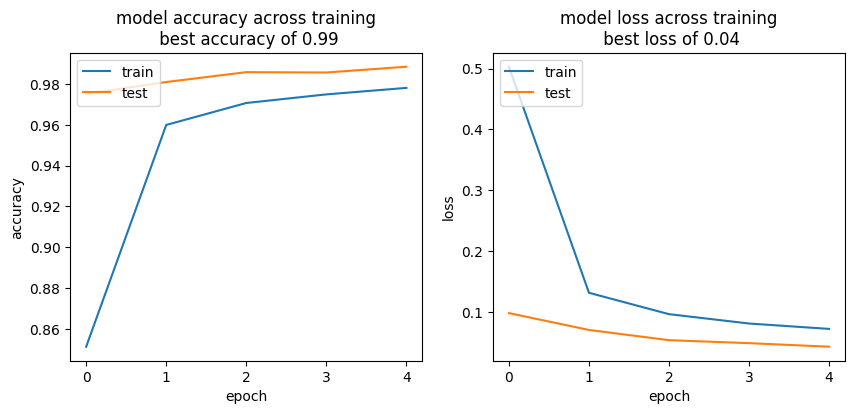

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plot_graphs(model_history, model_performance)

313/313 [==============================] - 1s 2ms/step


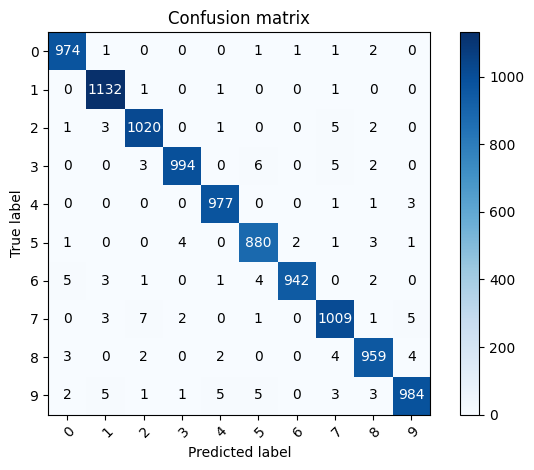

In [ ]:
y_test_class = np.argmax(y_test, axis = 1)

y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis = 1)

y_pred_max = np.zeros(y_pred.shape)
y_pred_max[np.arange(y_pred.shape[0]), y_pred_class] = 1

label_names = ['0','1','2','3','4','5','6','7','8','9']
labels = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(y_test_class, y_pred_class, labels)

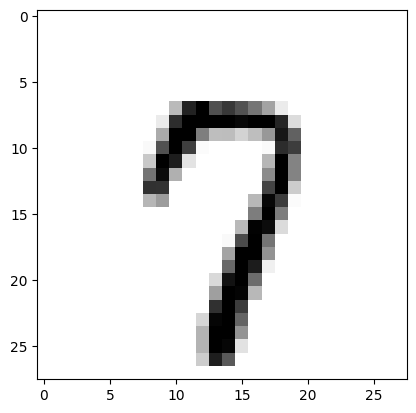

label: 7
prediction: [7]


In [ ]:
selection = 1401
result = np.argmax(model(np.expand_dims(x_test[selection], axis=(0))), axis=(1))
plt.imshow(x_test[selection], cmap='gray_r')
plt.show()
print("label:", np.argmax(y_test[selection], axis=(0)))
print("prediction:", result)

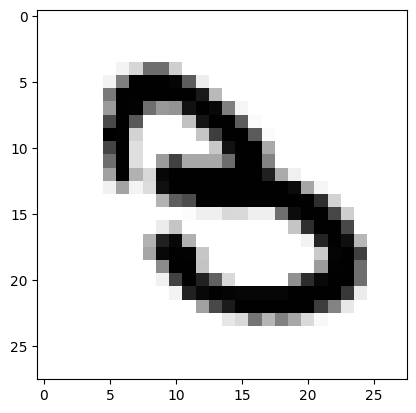

label: 3 prediction: 5


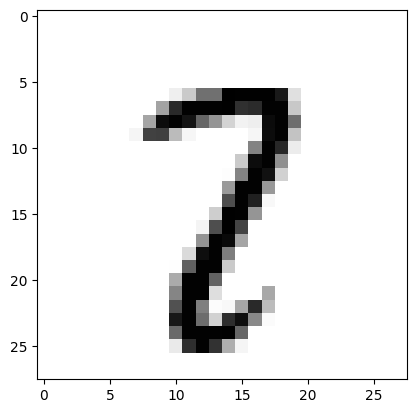

label: 2 prediction: 7


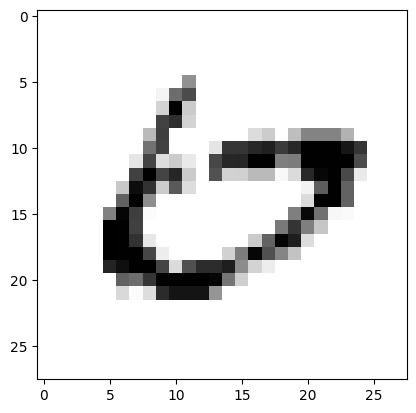

label: 6 prediction: 0


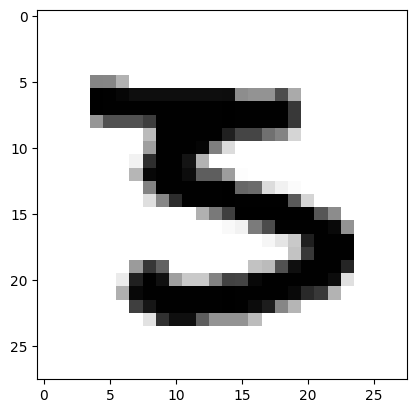

label: 3 prediction: 5


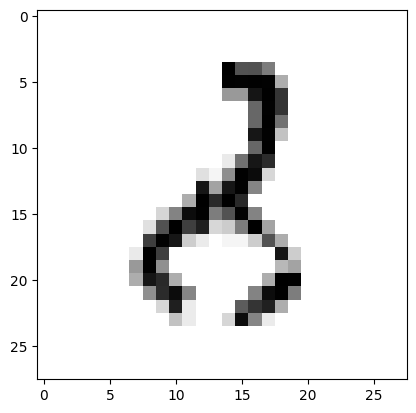

label: 8 prediction: 2


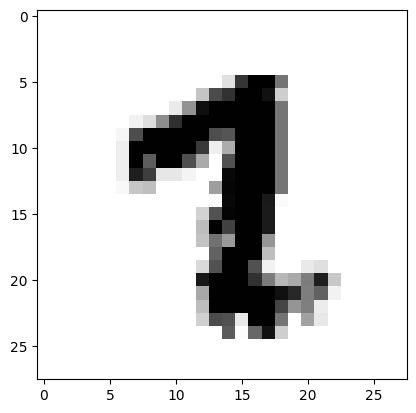

label: 2 prediction: 1


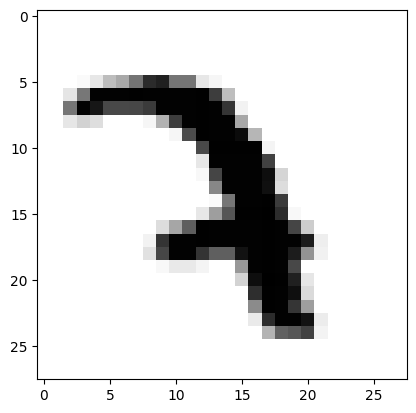

label: 7 prediction: 2


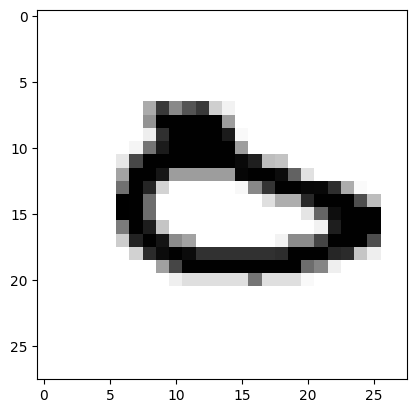

label: 0 prediction: 5


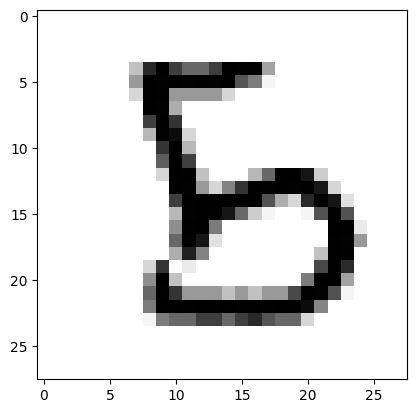

label: 5 prediction: 8


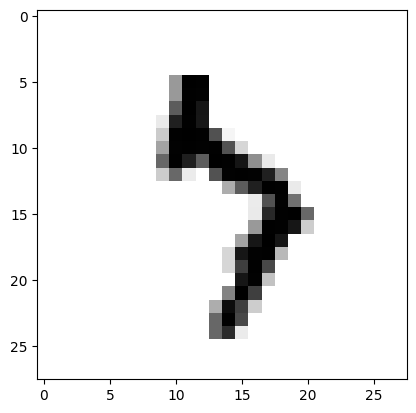

label: 7 prediction: 5


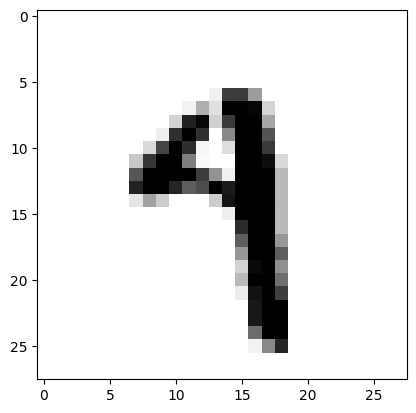

label: 4 prediction: 9


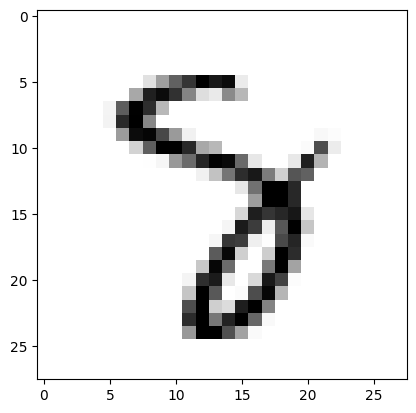

label: 8 prediction: 7


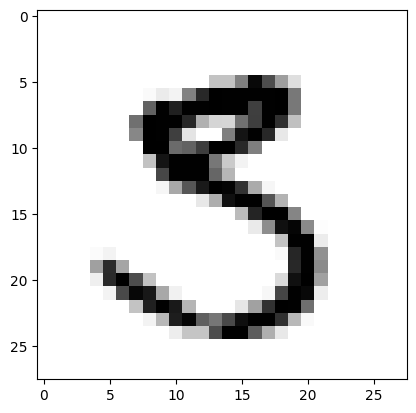

label: 3 prediction: 5


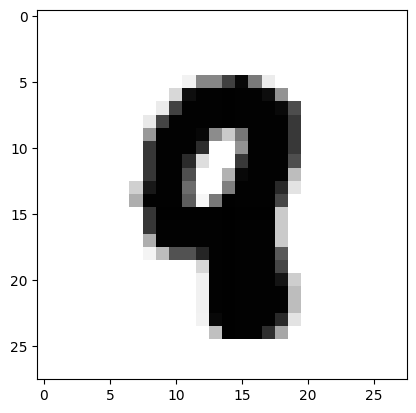

label: 8 prediction: 9


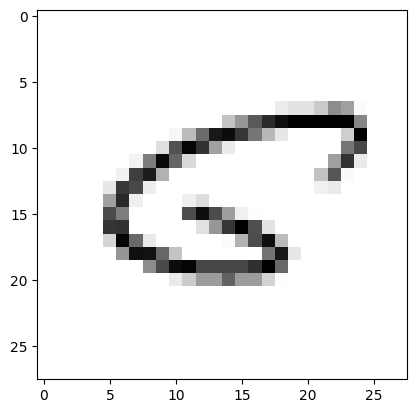

label: 6 prediction: 5


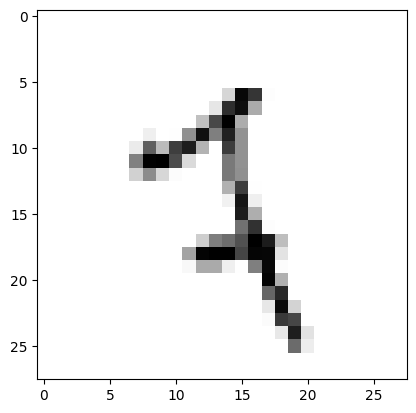

label: 7 prediction: 3


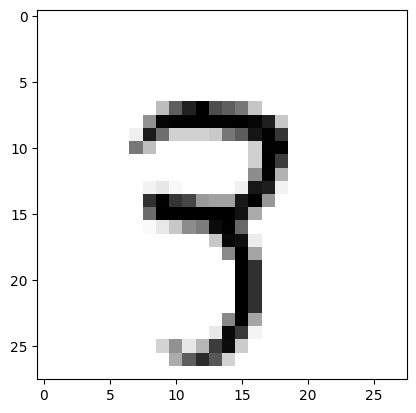

label: 3 prediction: 7


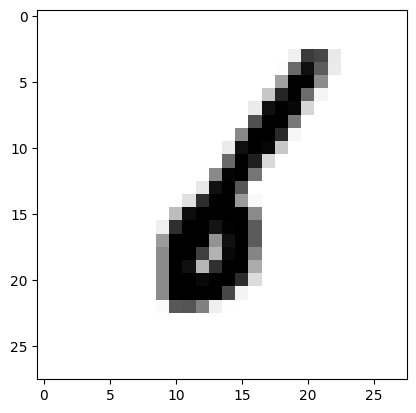

label: 6 prediction: 1


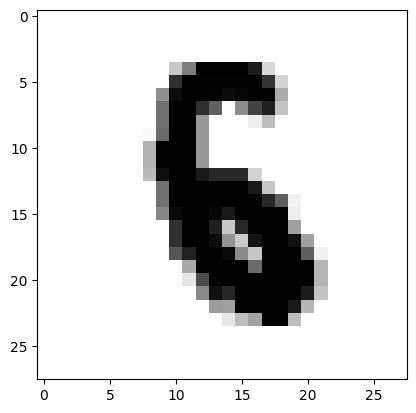

label: 6 prediction: 8


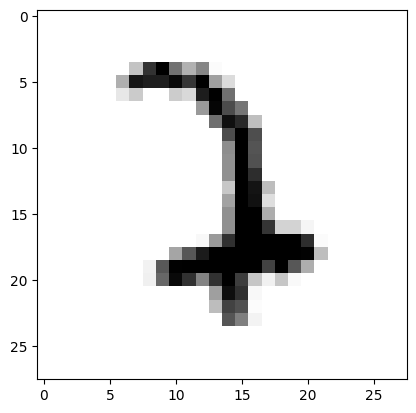

label: 7 prediction: 2


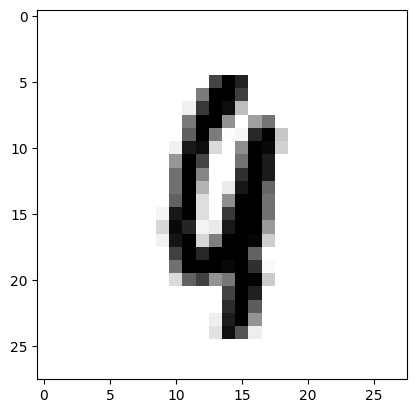

label: 9 prediction: 4


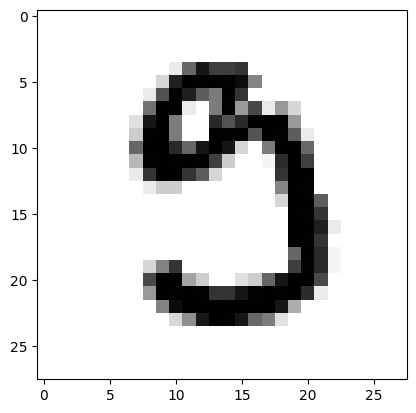

label: 9 prediction: 5


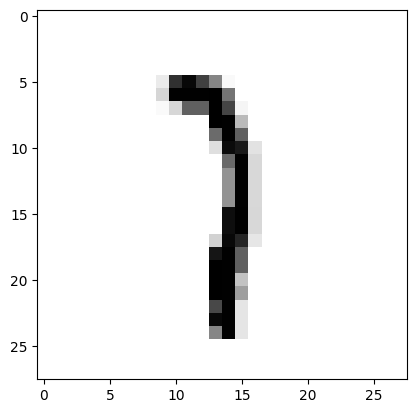

label: 7 prediction: 1


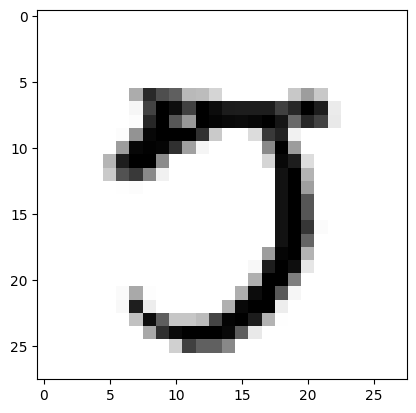

label: 5 prediction: 7


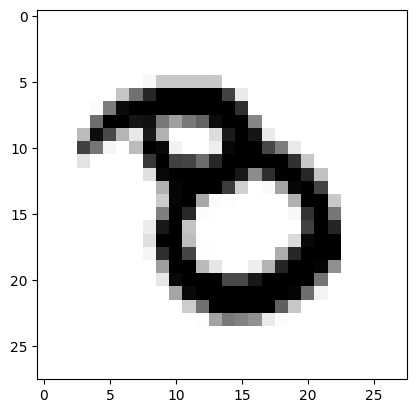

label: 8 prediction: 0


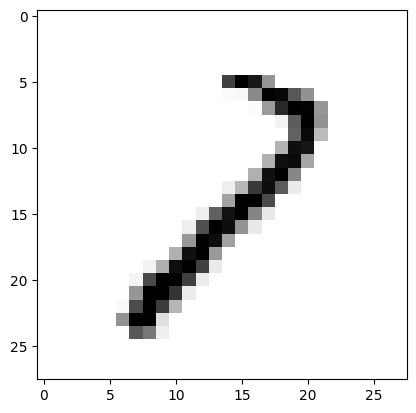

label: 7 prediction: 2


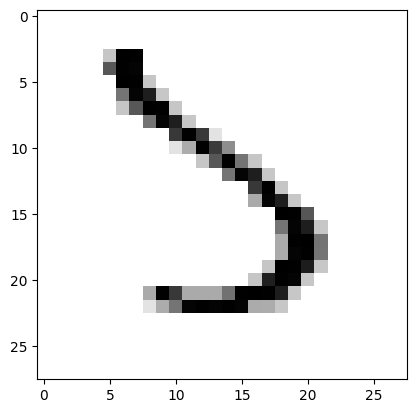

label: 5 prediction: 3


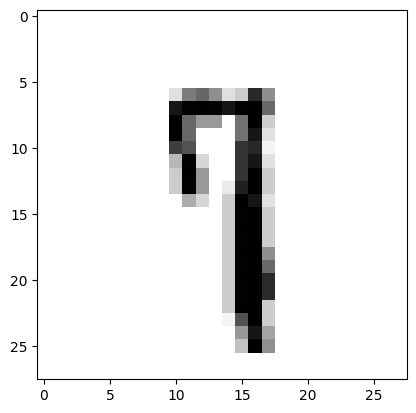

label: 7 prediction: 9


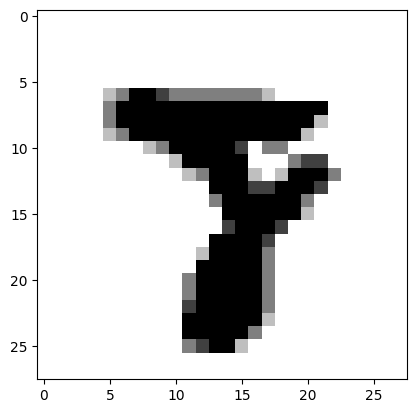

label: 8 prediction: 7


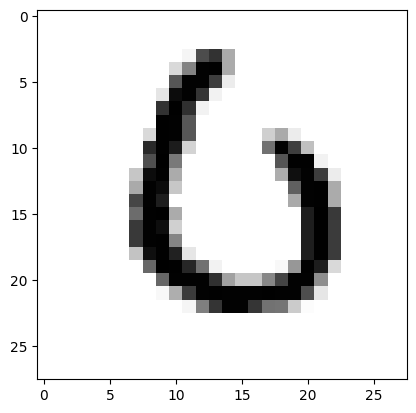

label: 0 prediction: 6


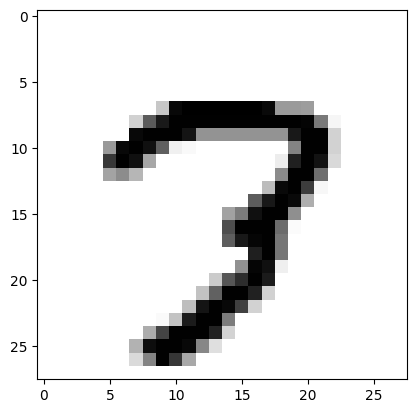

label: 3 prediction: 7


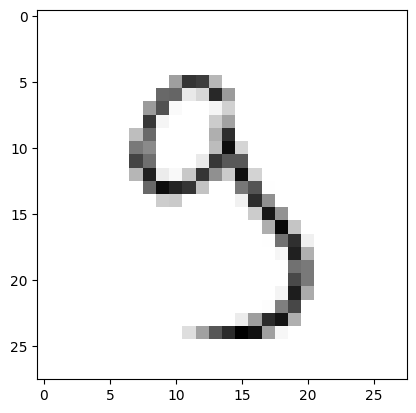

label: 9 prediction: 5


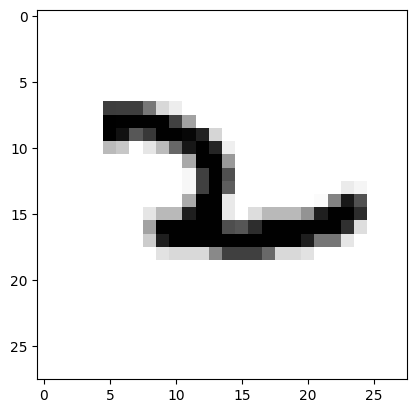

label: 2 prediction: 7


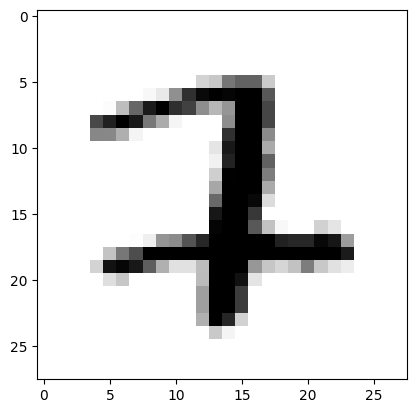

label: 7 prediction: 2


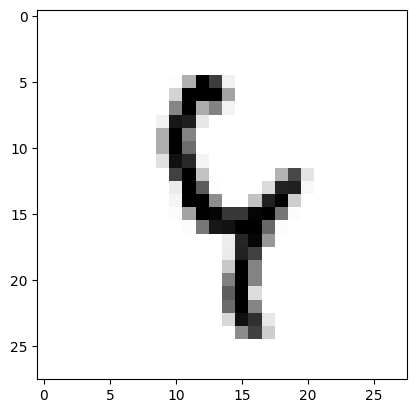

label: 9 prediction: 4


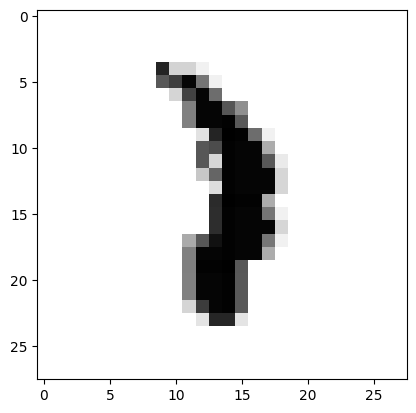

label: 1 prediction: 7


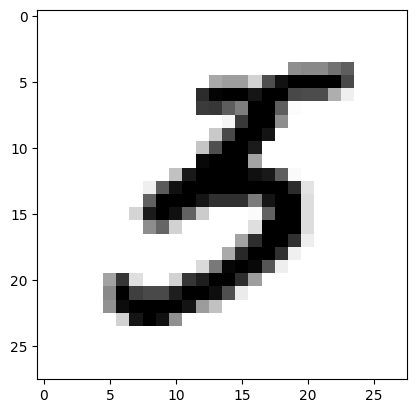

label: 5 prediction: 3


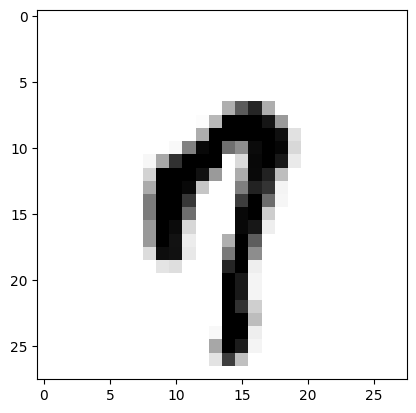

label: 7 prediction: 9


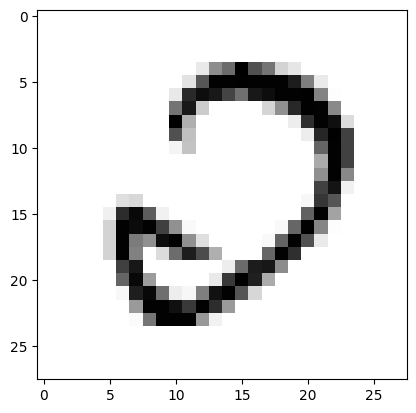

label: 2 prediction: 0


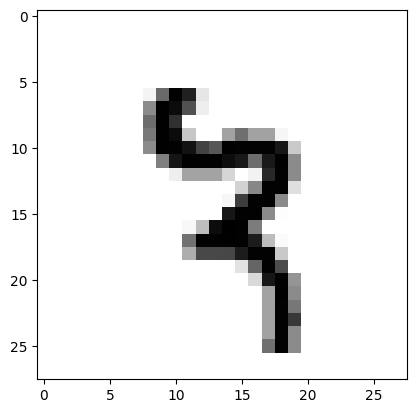

label: 3 prediction: 2


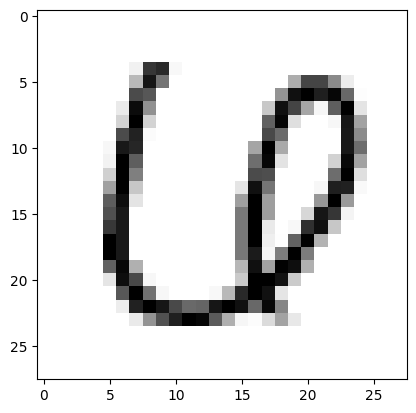

label: 6 prediction: 0


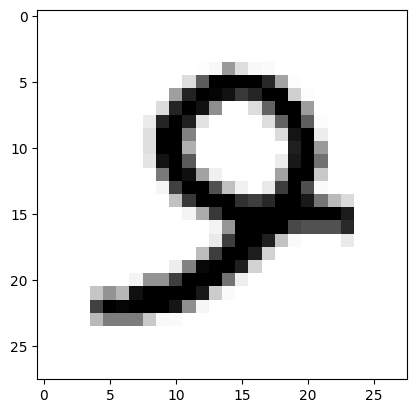

label: 9 prediction: 8


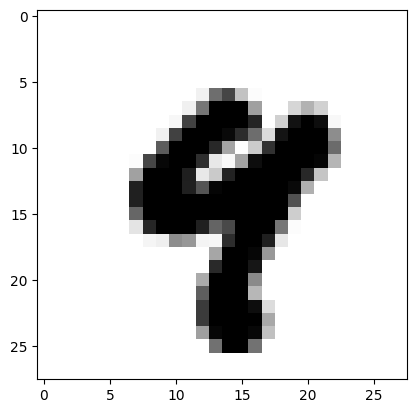

label: 4 prediction: 9


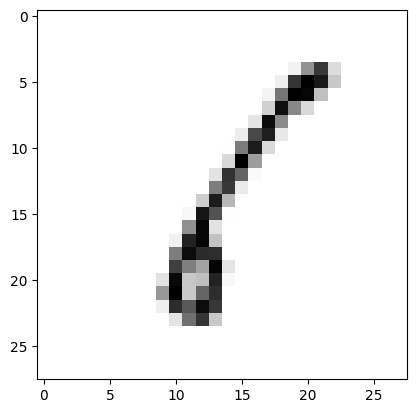

label: 6 prediction: 1


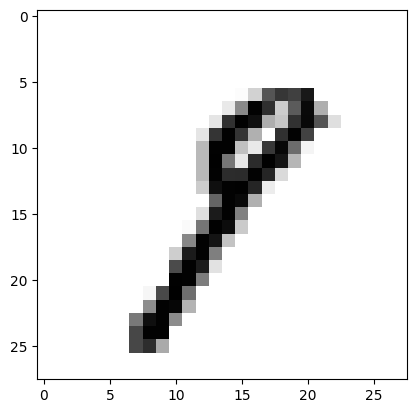

label: 9 prediction: 1


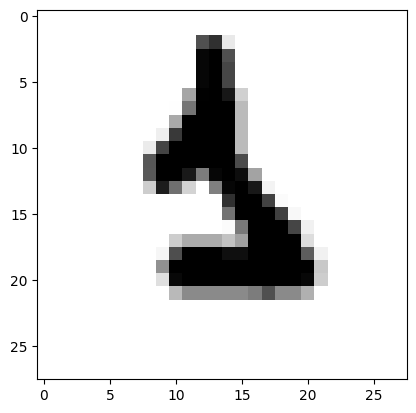

label: 1 prediction: 4


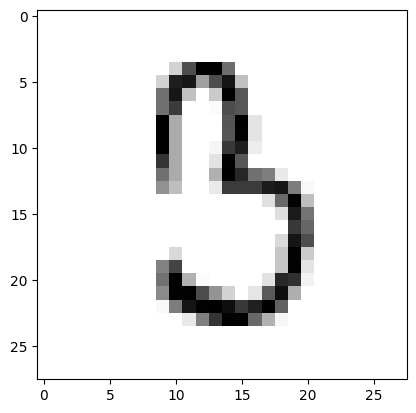

label: 3 prediction: 5


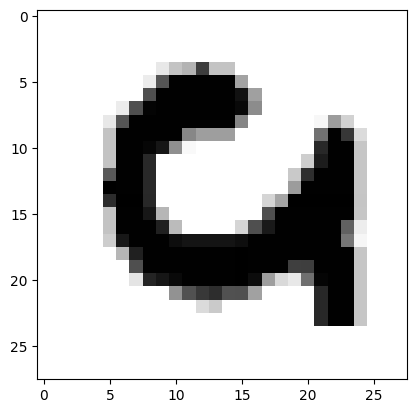

label: 9 prediction: 0


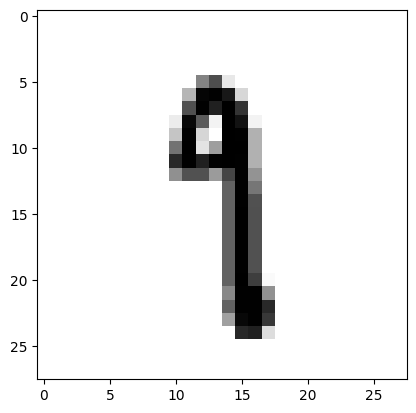

label: 9 prediction: 1


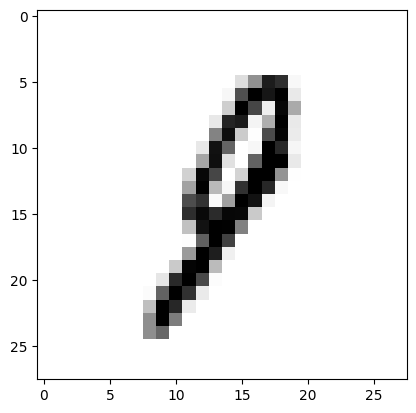

label: 9 prediction: 1


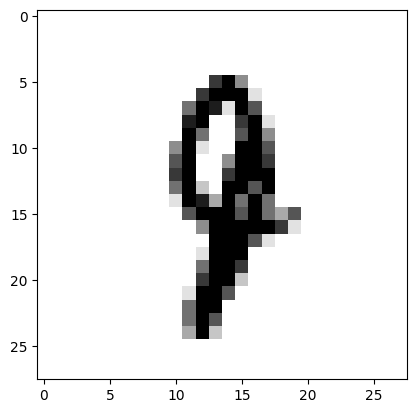

label: 9 prediction: 4


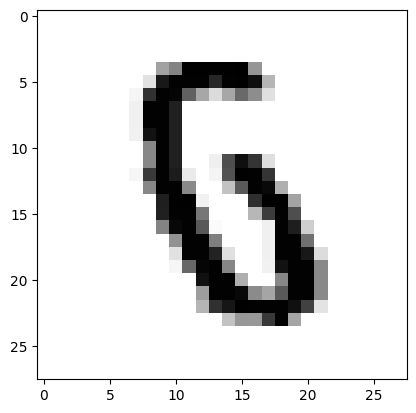

label: 6 prediction: 5


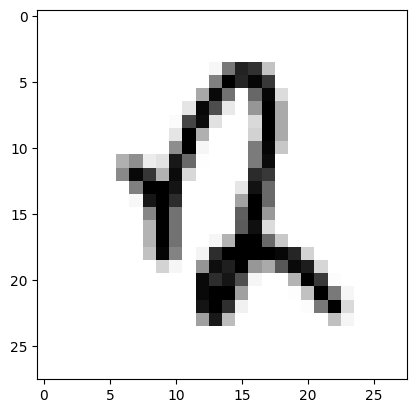

label: 2 prediction: 4


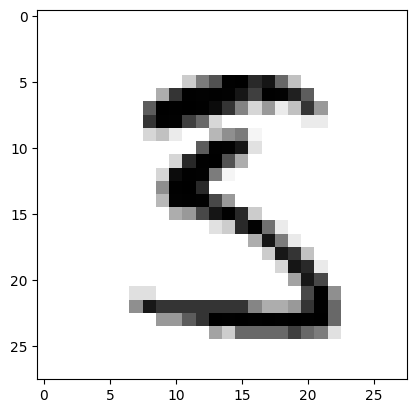

label: 5 prediction: 3


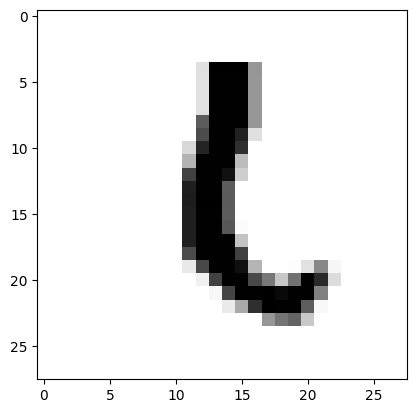

label: 6 prediction: 1


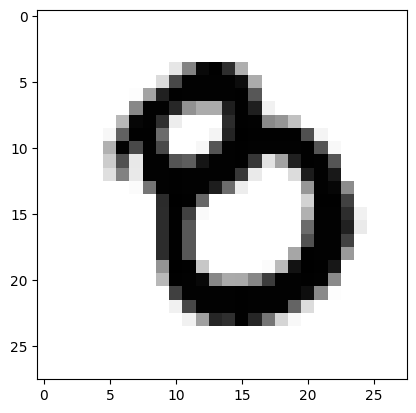

label: 8 prediction: 0


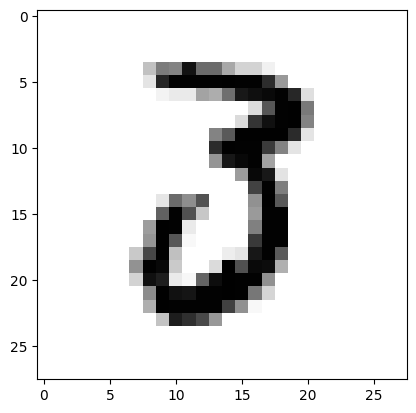

label: 3 prediction: 2


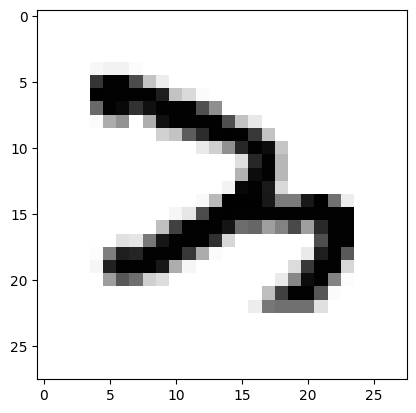

label: 3 prediction: 7


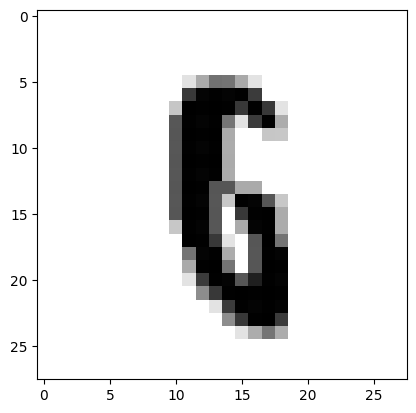

label: 6 prediction: 5


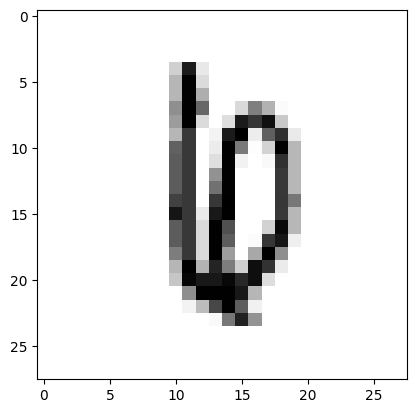

label: 6 prediction: 0


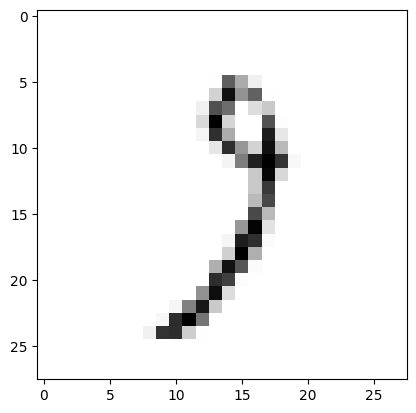

label: 9 prediction: 7


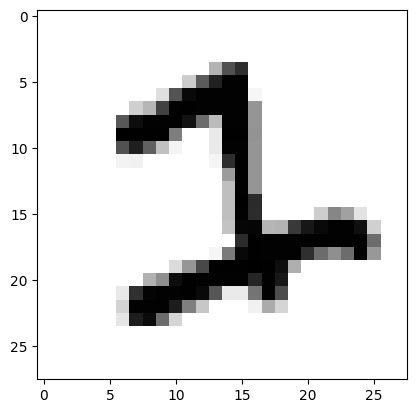

label: 1 prediction: 2


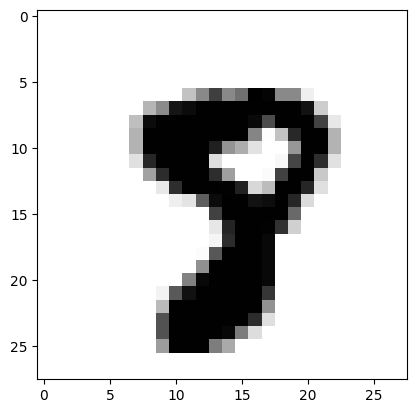

label: 8 prediction: 9


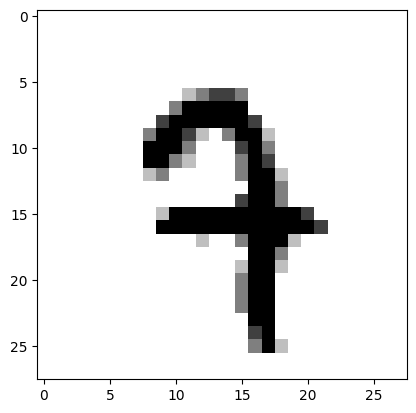

label: 7 prediction: 9


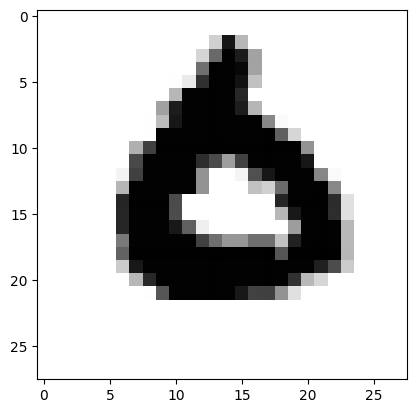

label: 6 prediction: 0


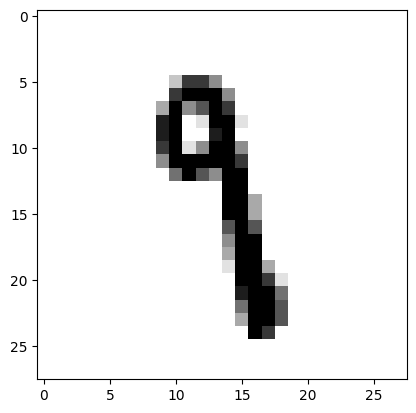

label: 9 prediction: 1


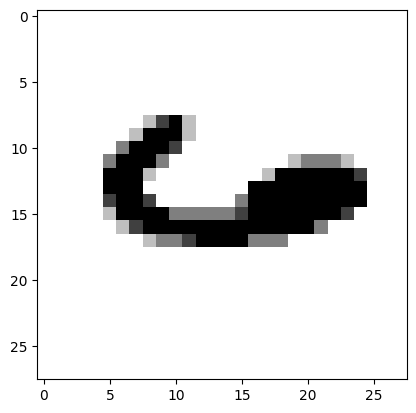

label: 6 prediction: 4


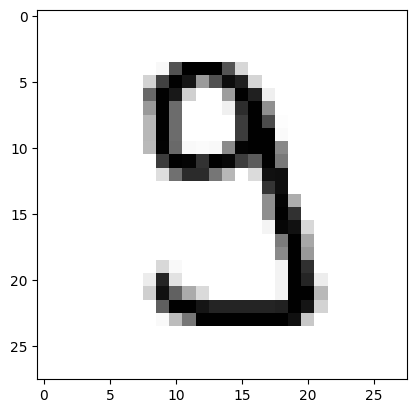

label: 9 prediction: 3


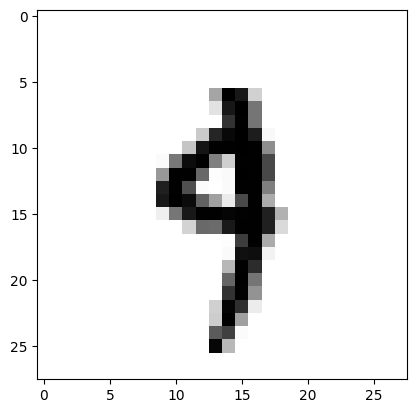

label: 4 prediction: 9


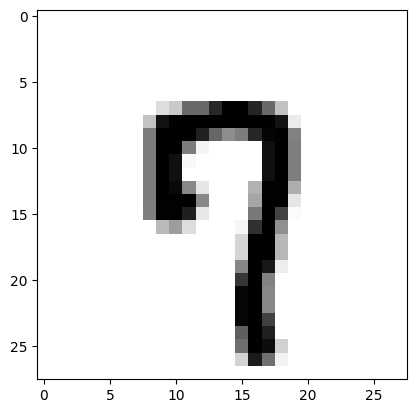

label: 7 prediction: 9


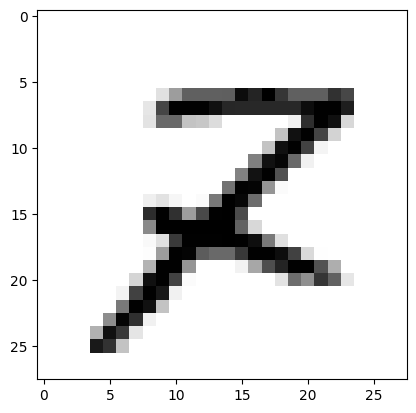

label: 7 prediction: 2


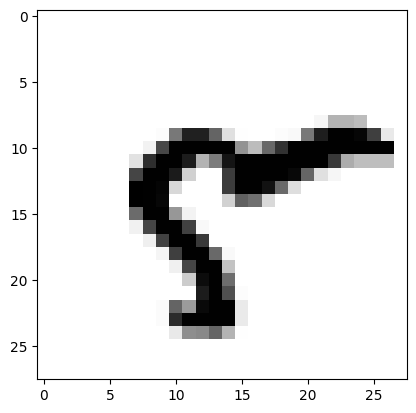

label: 5 prediction: 8


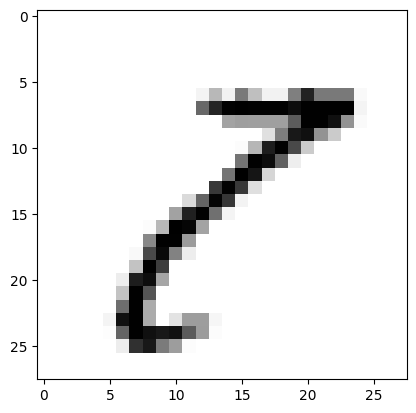

label: 7 prediction: 8


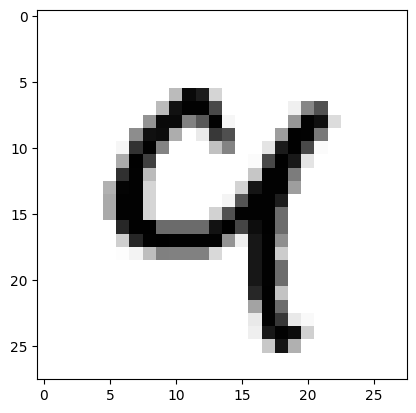

label: 9 prediction: 4


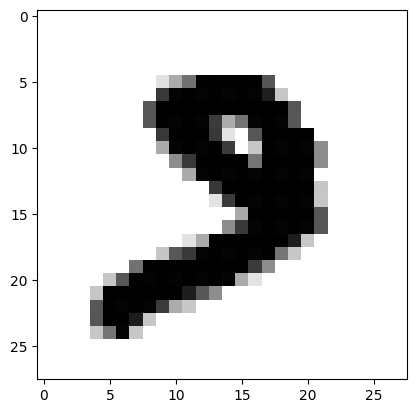

label: 9 prediction: 2


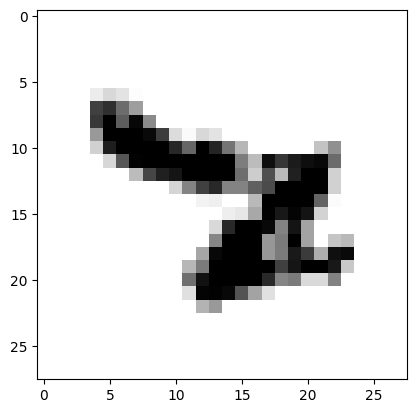

label: 2 prediction: 7


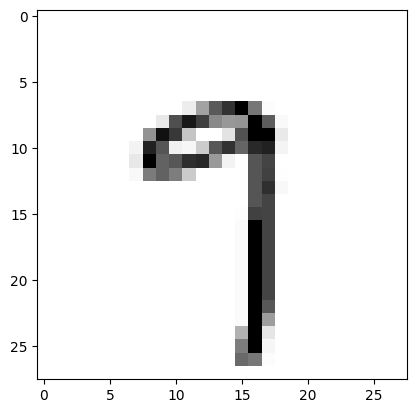

label: 9 prediction: 7


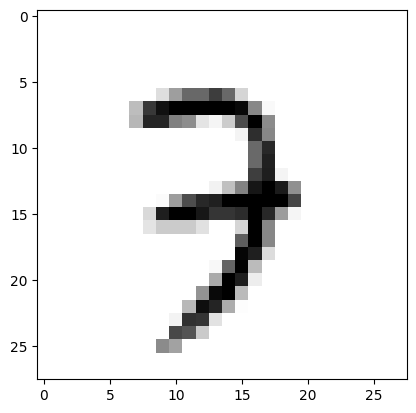

label: 7 prediction: 3


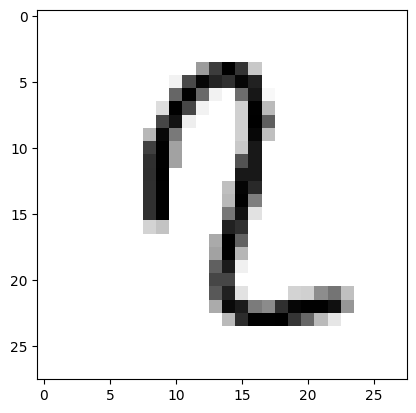

label: 2 prediction: 1


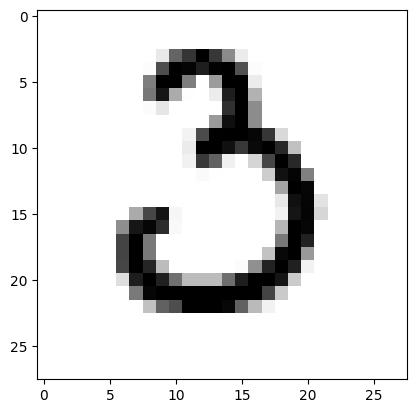

label: 3 prediction: 2


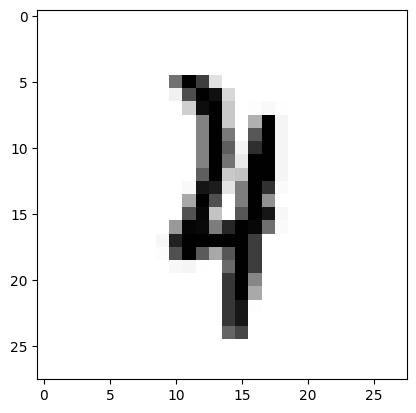

label: 4 prediction: 7


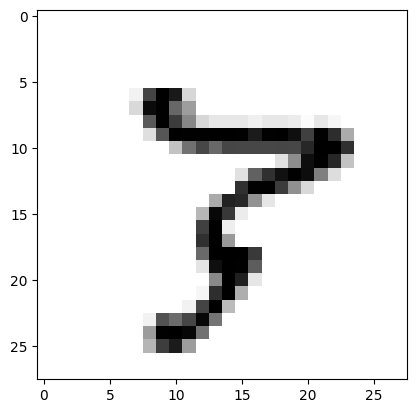

label: 3 prediction: 7


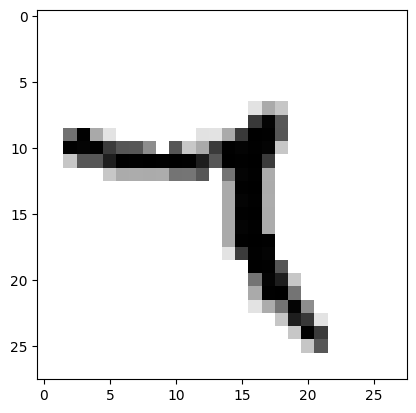

label: 7 prediction: 1


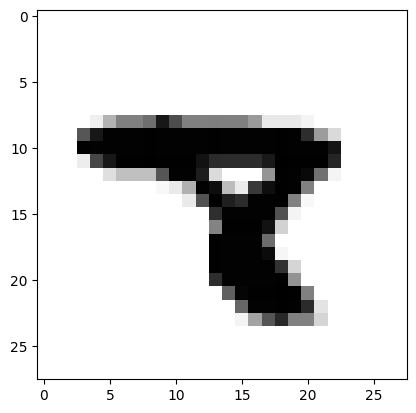

label: 8 prediction: 7


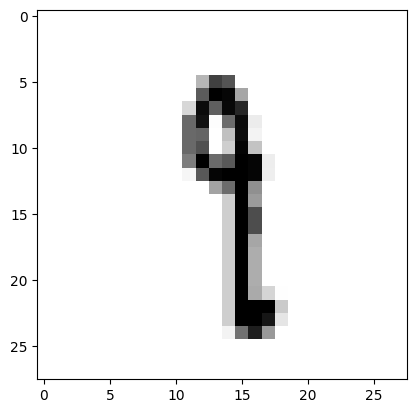

label: 9 prediction: 1


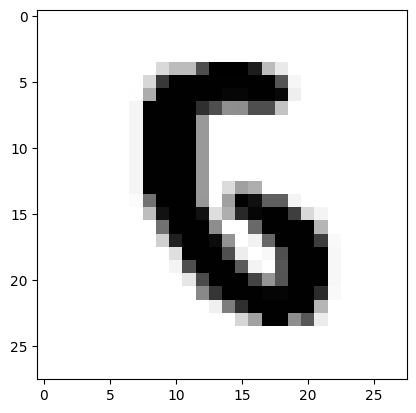

label: 6 prediction: 5


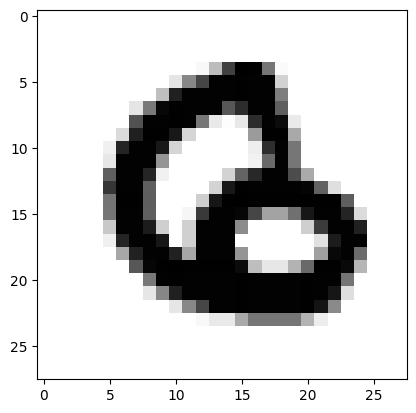

label: 6 prediction: 8


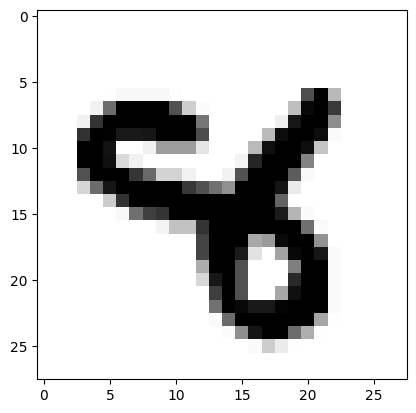

label: 8 prediction: 4


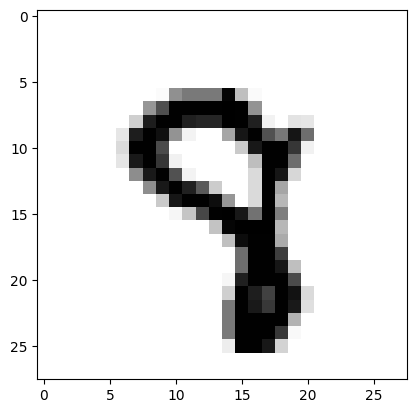

label: 8 prediction: 9


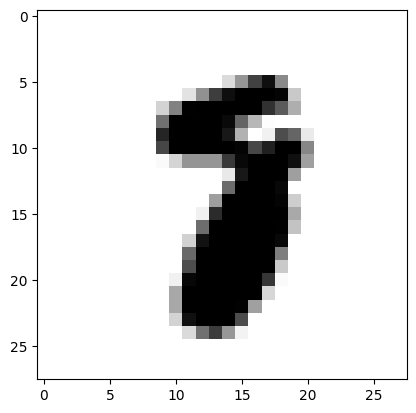

label: 8 prediction: 7


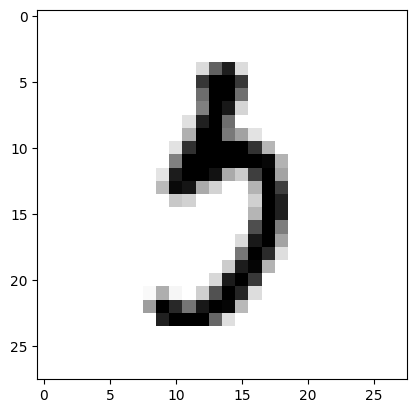

label: 3 prediction: 5


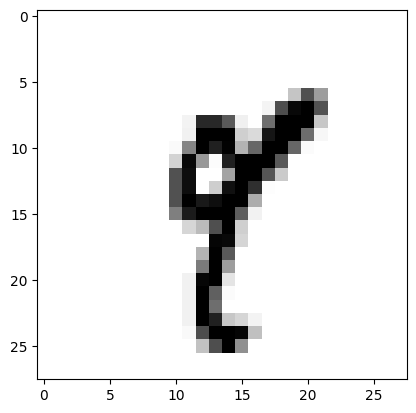

label: 9 prediction: 8


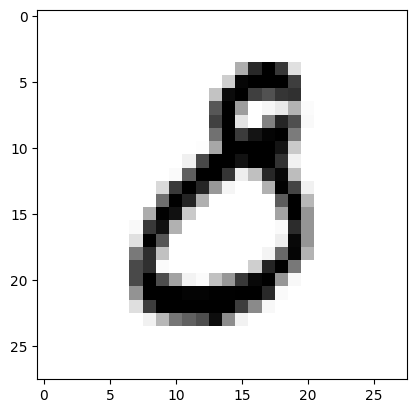

label: 8 prediction: 0


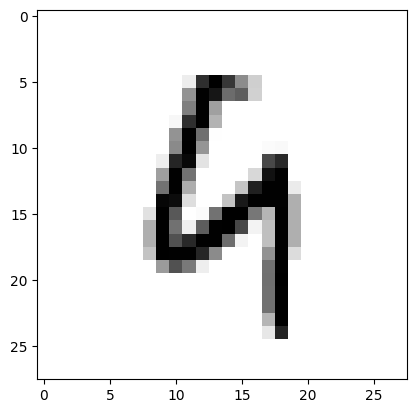

label: 9 prediction: 4


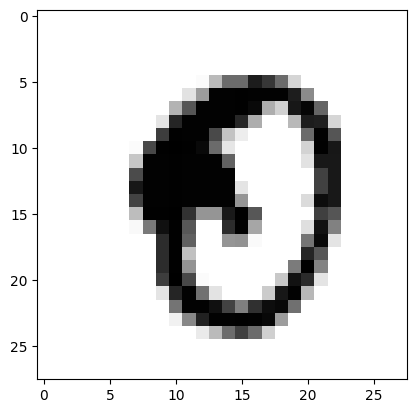

label: 0 prediction: 8


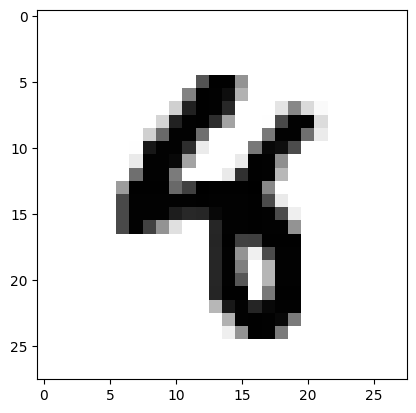

label: 8 prediction: 4


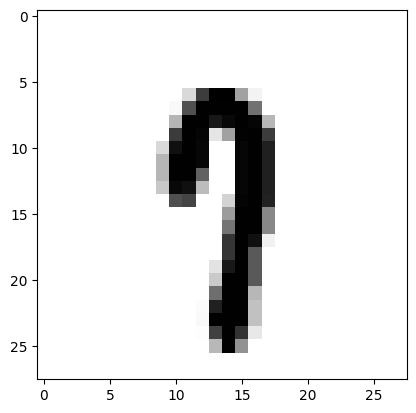

label: 7 prediction: 9


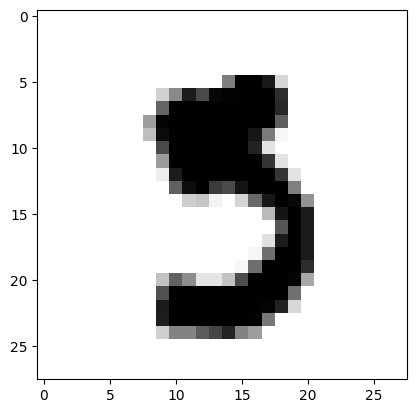

label: 5 prediction: 3


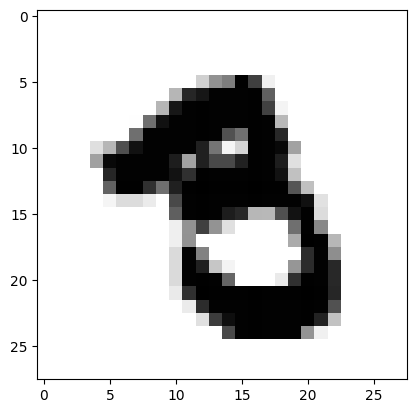

label: 3 prediction: 8


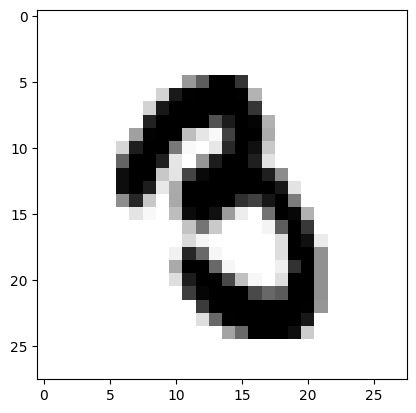

label: 3 prediction: 8


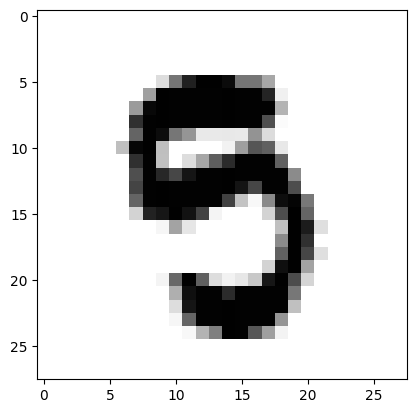

label: 5 prediction: 9


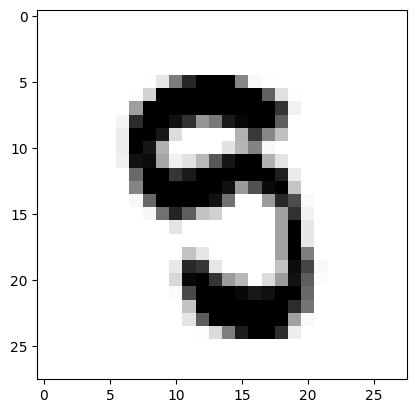

label: 5 prediction: 8


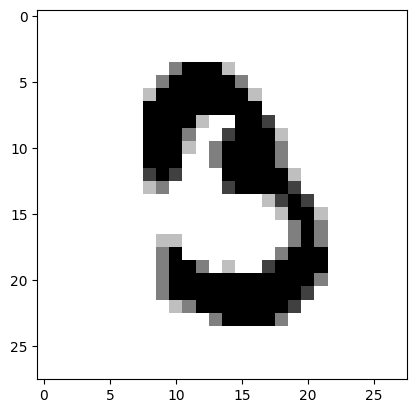

label: 3 prediction: 5


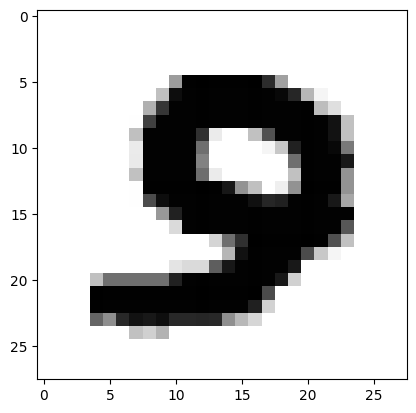

label: 9 prediction: 5


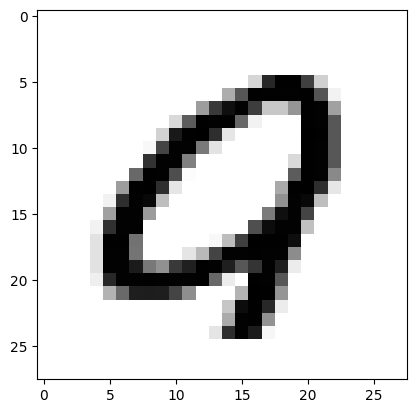

label: 9 prediction: 0


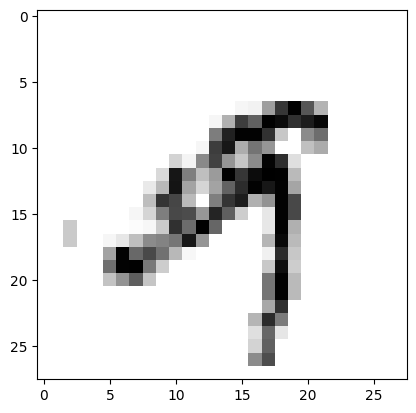

label: 9 prediction: 5


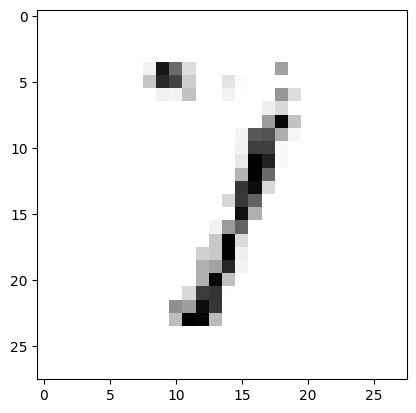

label: 7 prediction: 1


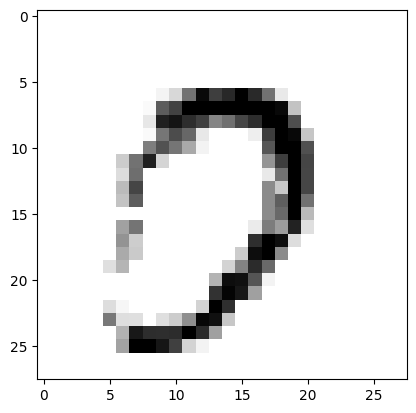

label: 0 prediction: 7


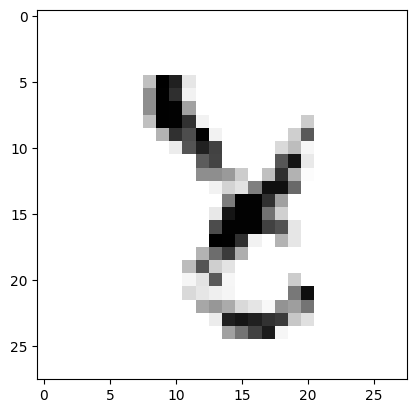

label: 8 prediction: 2


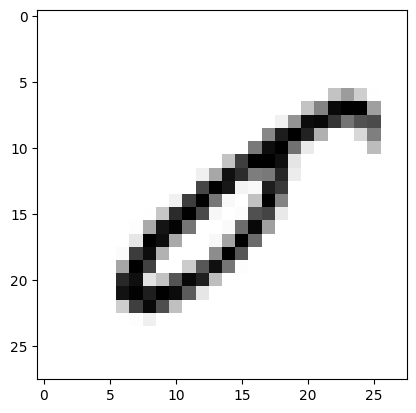

label: 0 prediction: 8


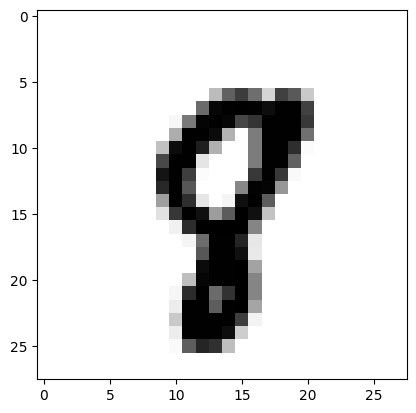

label: 8 prediction: 9


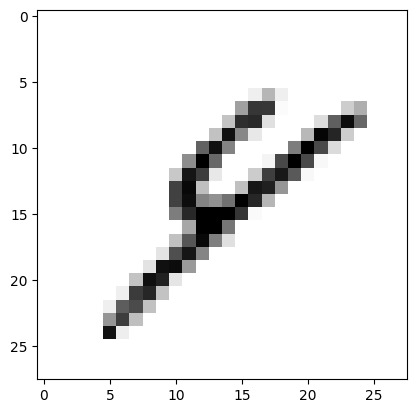

label: 4 prediction: 8


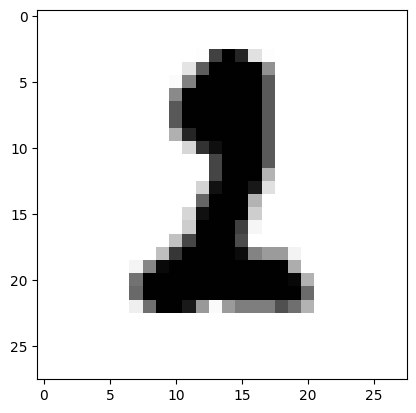

label: 2 prediction: 1


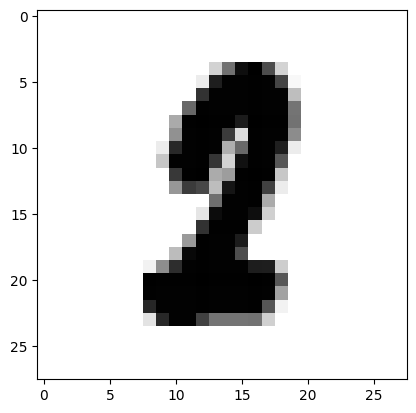

label: 2 prediction: 8


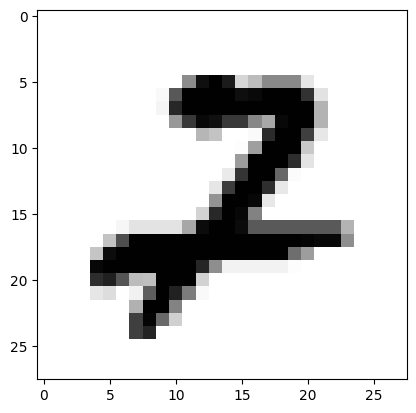

label: 7 prediction: 2


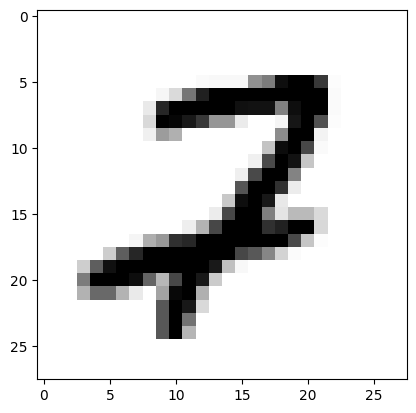

label: 7 prediction: 2


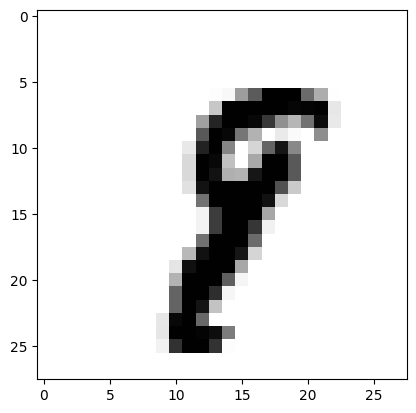

label: 9 prediction: 8


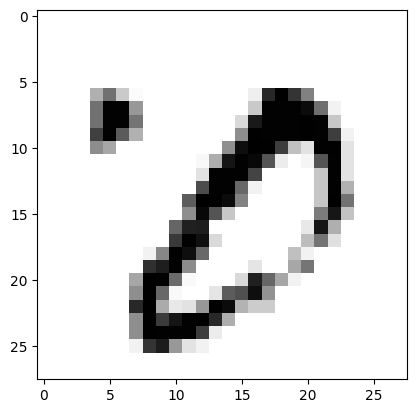

label: 0 prediction: 1


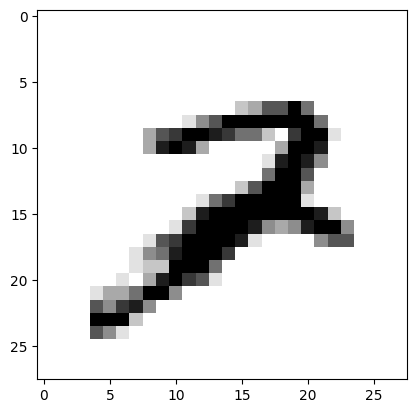

label: 2 prediction: 7


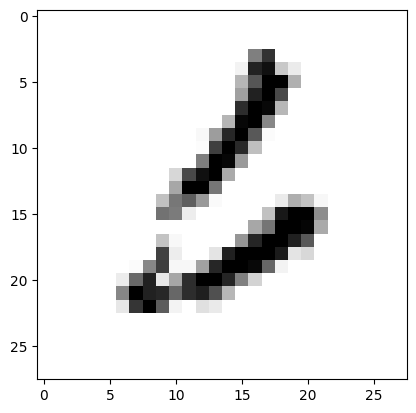

label: 6 prediction: 2


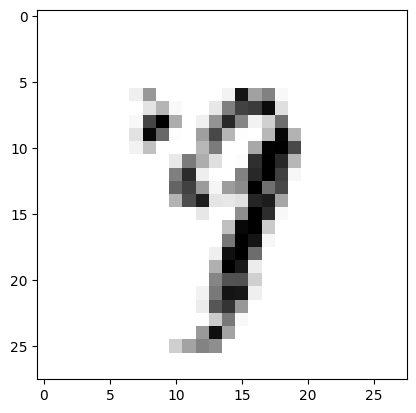

label: 9 prediction: 7


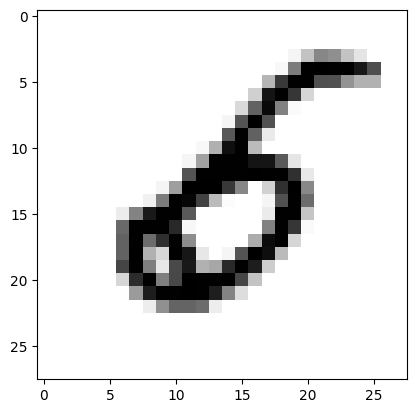

label: 5 prediction: 6


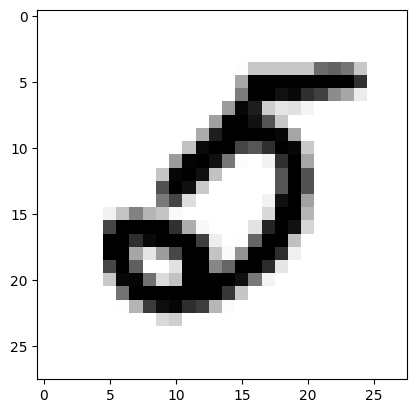

label: 5 prediction: 0


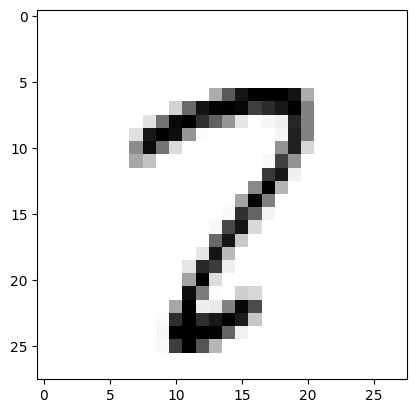

label: 2 prediction: 7


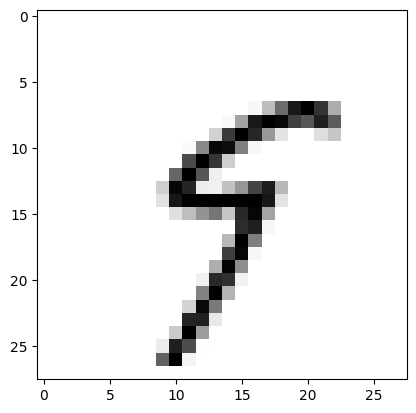

label: 9 prediction: 5


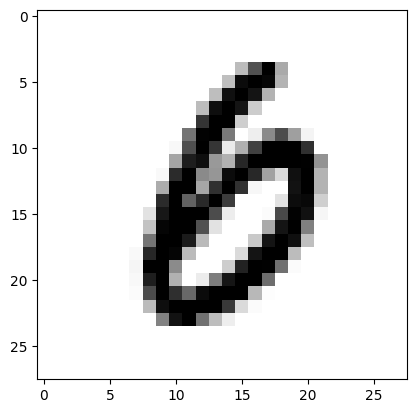

label: 6 prediction: 0


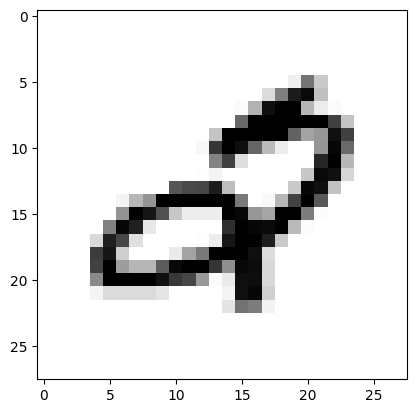

label: 2 prediction: 8


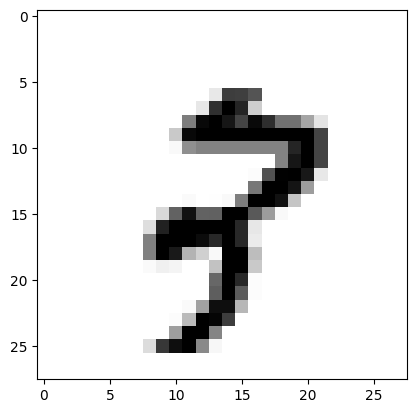

label: 3 prediction: 7


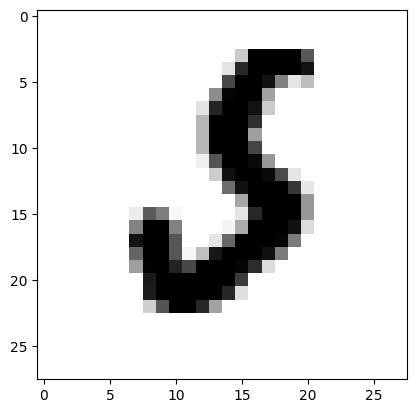

label: 5 prediction: 6


In [ ]:
for index, i in enumerate(y_pred_class):
  if y_test_class[index] != i:
    plt.imshow(x_test[index], cmap='gray_r')
    plt.show()
    print("label:", y_test_class[index], "prediction:", i)

